# Space_Titanic_Predicion

In [1]:
## import the pandas library
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
traning_set = pd.read_csv('train.csv')
traning_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_set=pd.read_csv("test.csv")
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


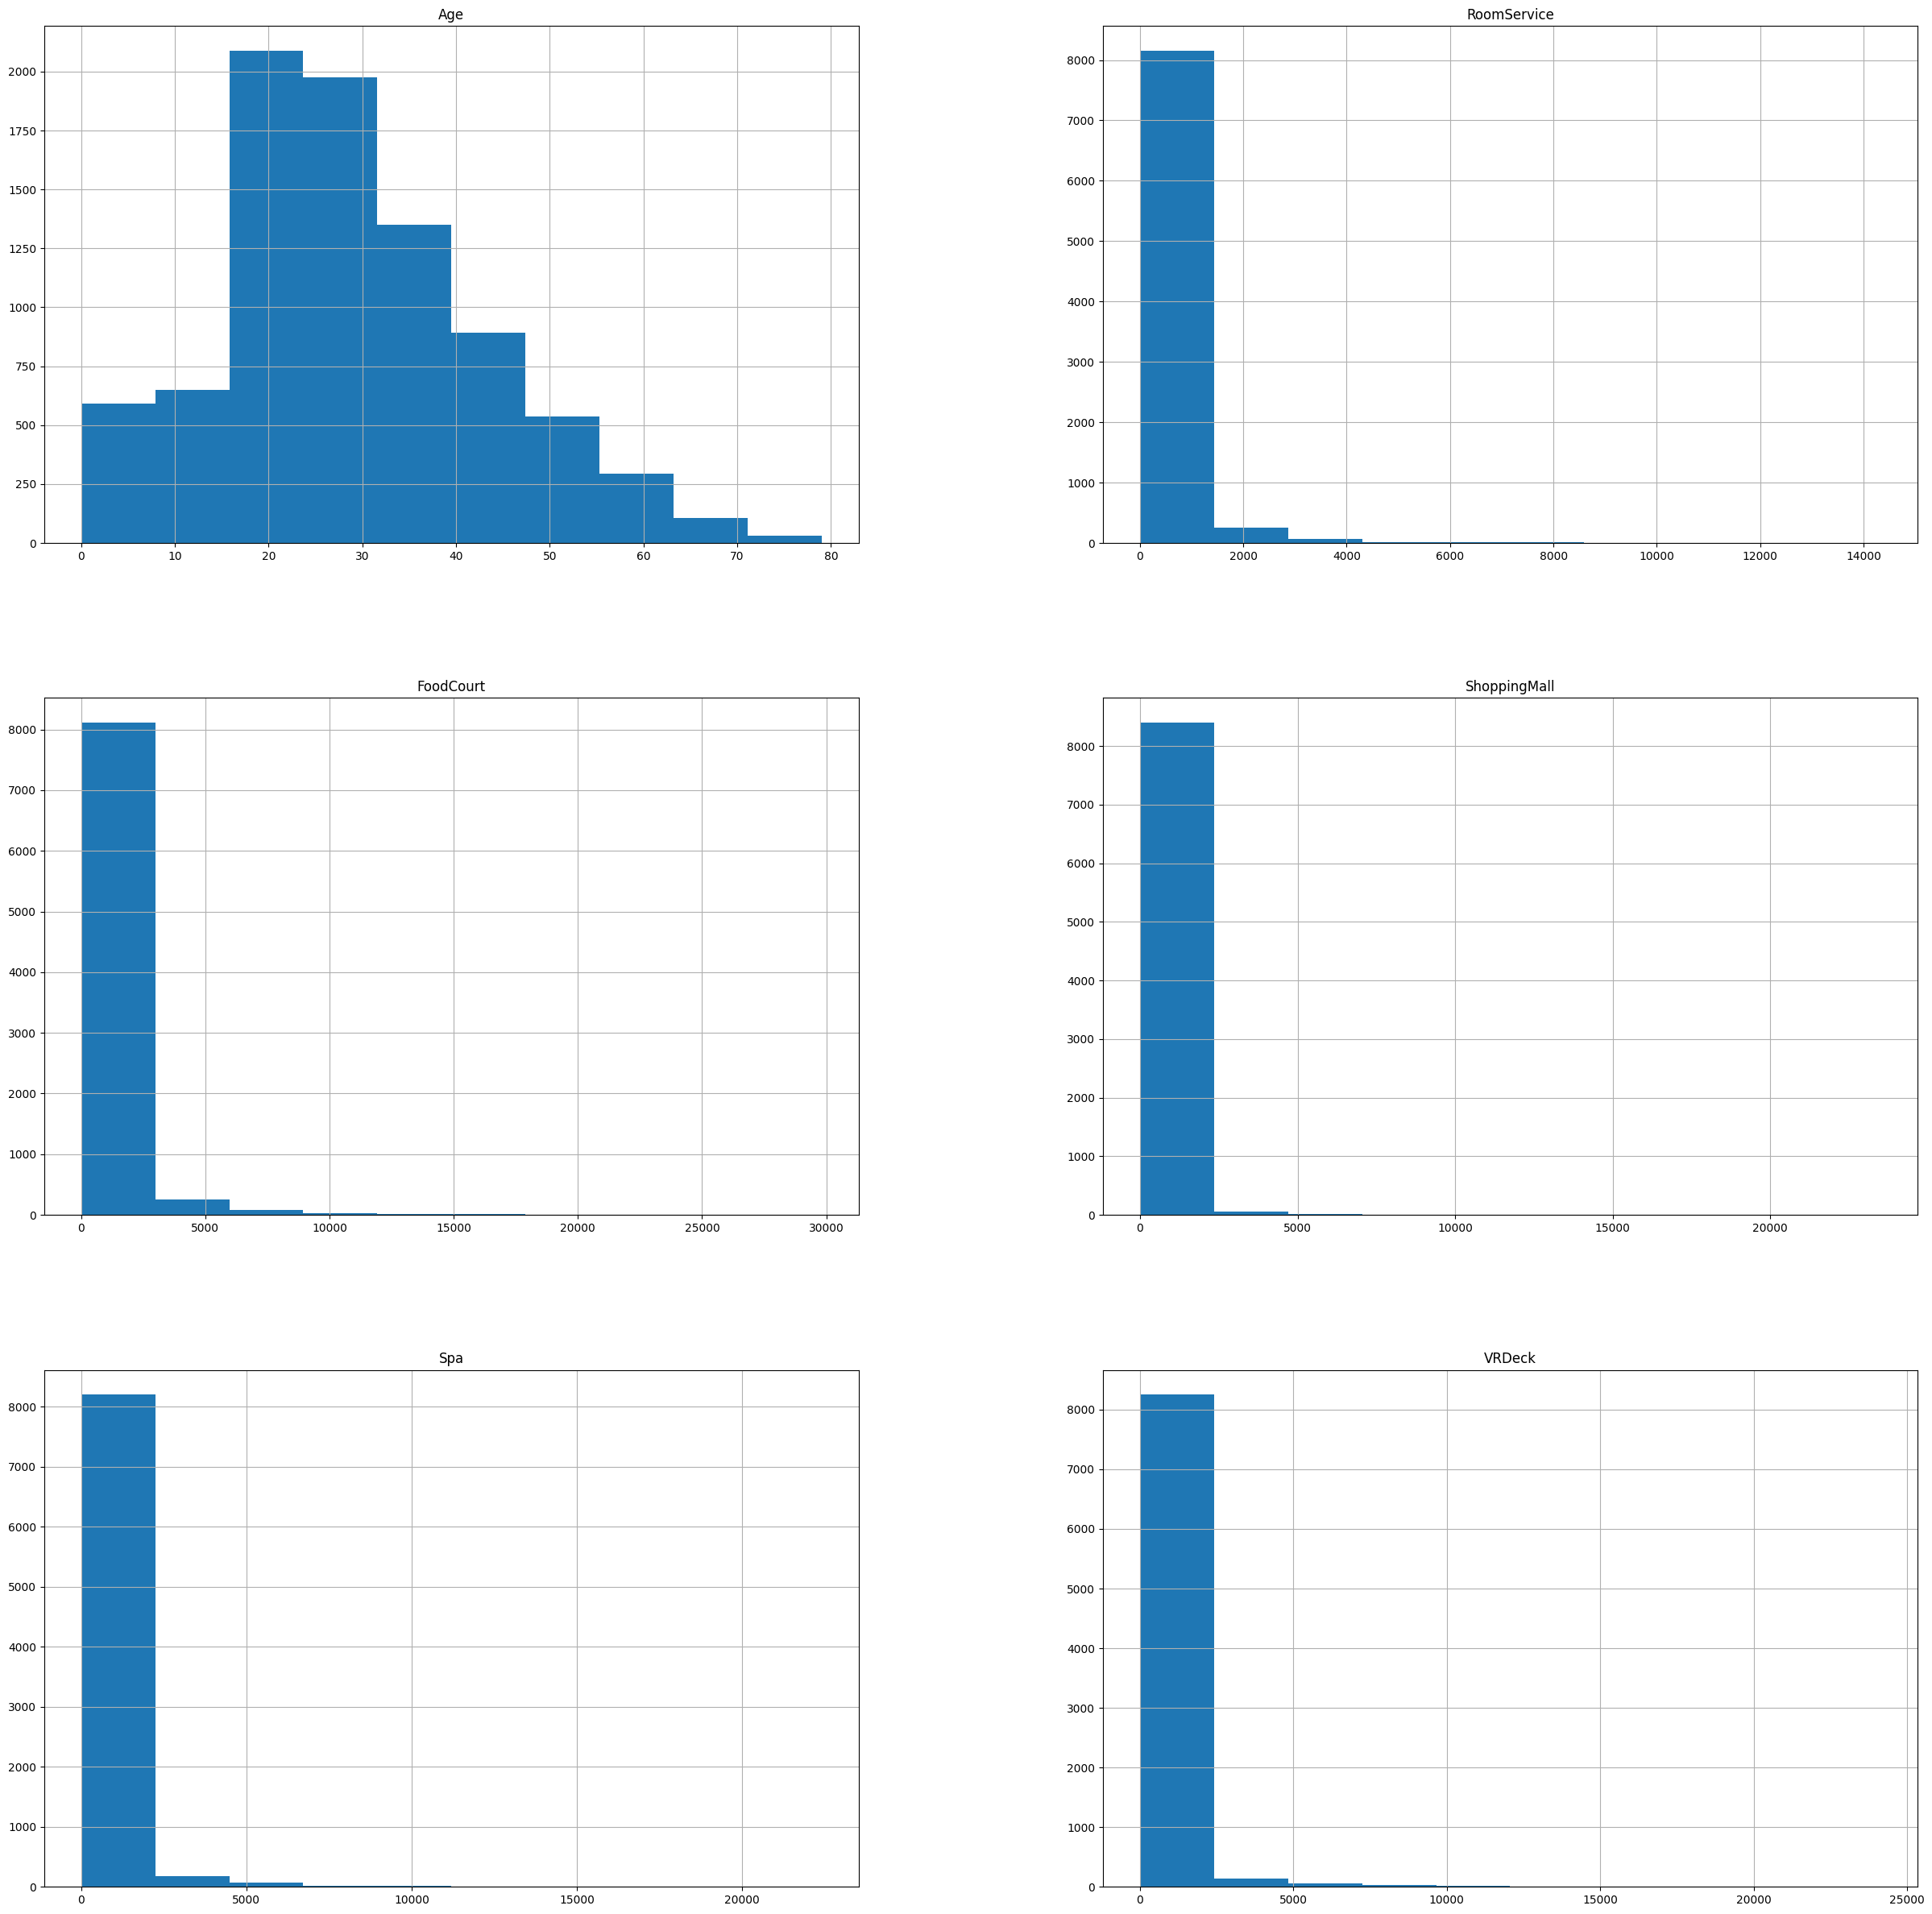

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
traning_set.hist(bins=10, figsize =(30,30))
plt.show()

In [5]:
## summer statistic of the training set

In [6]:
traning_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# EDA (Explotary Data Analysis)

In [7]:
traning_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
import pandas as pd

#Assuming your DataFrame is named 'df'
# Replace 'HomePlane' with the actual name of your column
# Replace np.nan with the actual representation of null values in your DataFrame
traning_set.loc[traning_set['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'
traning_set.loc[traning_set['Destination'].isnull(), 'Destination']  ='TRAPPIST-1e'
traning_set.loc[traning_set['Age'].isnull(), 'Age']  = traning_set['Age'].median()
traning_set.loc[traning_set['RoomService'].isnull(), 'RoomService'] = traning_set['RoomService'].median()
traning_set.loc[traning_set['FoodCourt'].isnull(), 'FoodCourt'] = traning_set['FoodCourt'].median()
traning_set.loc[traning_set['ShoppingMall'].isnull(), 'ShoppingMall'] = traning_set['ShoppingMall'].median()
traning_set.loc[traning_set['Spa'].isnull(), 'Spa'] = traning_set['Spa'].median()
traning_set.loc[traning_set['VRDeck'].isnull(), 'VRDeck'] = traning_set['VRDeck'].median()
traning_set.drop('Name', axis=1, inplace=True)
traning_set.drop('Cabin',axis=1, inplace=True)

In [9]:
import pandas as pd

#set the option to display all raws
pd.set_option('display.max_rows',None)

In [10]:
# Assuming 'training_set' is your DataFrame containing your training dataset
print(traning_set.head())

  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [11]:
traning_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [12]:
traning_set.replace({'HomePlanet':{'Earth' :10, 'Europa' :20 , 'Mars' :30}},inplace=True)
traning_set.replace({'Destination':{'TRAPPIST-1e':10,'55 Cancri e':20, 'PSO J318.5-22':30}},inplace=True)
#

C:\Users\Sandun\AppData\Local\Temp\ipykernel_9188\3748879629.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traning_set.replace({'HomePlanet':{'Earth' :10, 'Europa' :20 , 'Mars' :30}},inplace=True)
C:\Users\Sandun\AppData\Local\Temp\ipykernel_9188\3748879629.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traning_set.replace({'Destination':{'TRAPPIST-1e':10,'55 Cancri e':20, 'PSO J318.5-22':30}},inplace=True)


In [13]:
traning_set.head(500)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,20,False,10,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,10,False,10,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,20,False,10,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,20,False,10,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,10,False,10,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,0005_01,10,False,30,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,0006_01,10,False,10,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,0006_02,10,True,10,28.0,False,0.0,0.0,0.0,0.0,0.0,True
8,0007_01,10,False,10,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,0008_01,20,True,20,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [14]:
## our target variable is Transported. that variable is available in dataset. which means we need to use 
##the supervised learning method

In [15]:
traning_set_data = traning_set.drop("Transported",axis=1)
traning_set.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,20,False,10,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,10,False,10,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,20,False,10,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,20,False,10,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,10,False,10,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [16]:
training_set_data_lable = traning_set['Transported'].copy()
training_set_data_lable.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [17]:
training_set_data_lable.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


# Select the ML model and training

In [18]:
## split the training dataset into  the  training and validation set for training and validating model
from sklearn.model_selection import train_test_split

# Splitting train set into the training and validation set
X_train, X_test, y_train, y_test = train_test_split(traning_set_data, training_set_data_lable, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2333,2513_01,10,False,10,28.0,False,0.0,55.0,0.0,656.0,0.0
2589,2774_02,10,False,10,17.0,False,0.0,1195.0,31.0,0.0,0.0
8302,8862_04,20,True,20,28.0,False,0.0,0.0,0.0,0.0,0.0
8177,8736_02,30,False,10,20.0,False,0.0,2.0,289.0,976.0,0.0
500,0539_02,20,True,20,36.0,False,0.0,0.0,0.0,0.0,0.0


In [20]:
y_test.head()

304      True
2697    False
8424    False
1672     True
8458     True
Name: Transported, dtype: bool

In [21]:
#Import the models

from sklearn.tree import DecisionTreeClassifier
Dt_clf=DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 0.7200


In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Now fit the Logistic Regression model
LR_clf.fit(X_train_imputed, y_train)


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create a pipeline with imputer and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())])

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Create the classifier that handles missing values
HGB_clf = HistGradientBoostingClassifier()

# Train the classifier on the training data
HGB_clf.fit(X_train, y_train)

# Make predictions on the test data
Lr_value_predictions = HGB_clf.predict(X_test)

# Calculate the accuracy score
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")



Validation Accuracy: 0.7849


In [32]:
def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("Logistic Regression")
LR_accuracy = modelEvaluation(LR_clf, X_test, y_test)

print("Decision Tree")
DT_accuracy = modelEvaluation(Dt_clf , X_test, y_test)


# Now you have the accuracy scores stored in variables for later use
print(f"LR Accuracy: {LR_accuracy:.4f}")
print(f"DT Accuracy: {DT_accuracy:.4f}")

Logistic Regression


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values